Using Decision Trees / Logistic Regression to predict the species of a flower

Import the dataset

In [2]:
import pandas as pd

df = pd.read_csv("IRIS.csv")

Dataset analysis:

The dataset contains a set of 150 records under 5 attributes
- Petal Length
- Petal Width
- Sepal Length
- Sepal width
- Class(Species).

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
print("Shape of the dataset " + str(df.shape))

Shape of the dataset (150, 5)


We have an intuition about the dataset now, but we have to dig deeper to use it at full potential.

Let's check if we have duplicates instances

In [6]:
print('Number of duplicate instances: ' + str(df.duplicated().sum()))

Number of duplicate instances: 3


We notice that we have 3 duplicate instances. Solution remove them.

In [7]:
df = df.drop_duplicates()

Check now if we have some null data among the instances.

In [8]:
print('Number of null features: \n' + str(df.isnull().sum()))

Number of null features: 
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [9]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109321,0.871305,0.817058
sepal_width,-0.109321,1.000000,-0.421057,-0.356376
petal_length,0.871305,-0.421057,1.000000,0.961883
petal_width,0.817058,-0.356376,0.961883,1.000000


<AxesSubplot:>

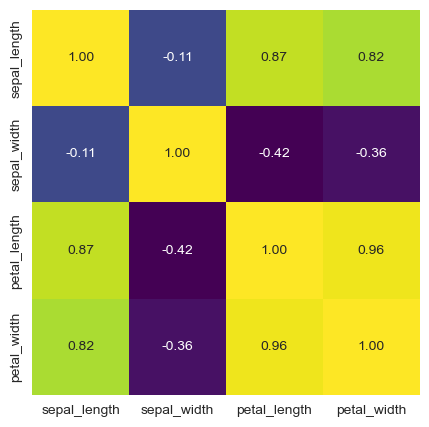

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cbar=None,cmap='viridis')

What about the labels ?

In [22]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [26]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
df["species"] = labelEncoder.fit_transform(df["species"])

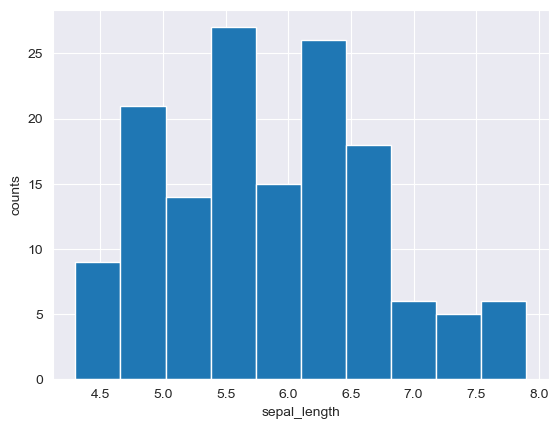

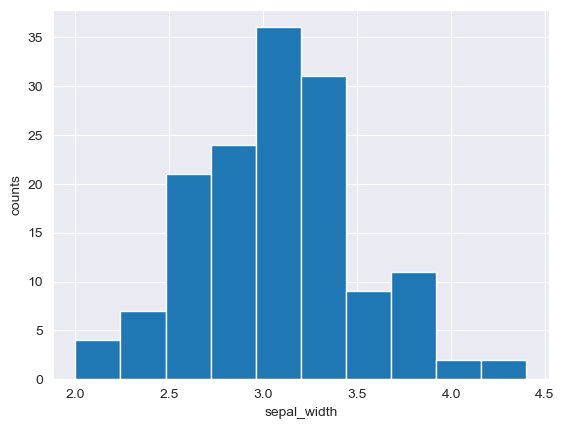

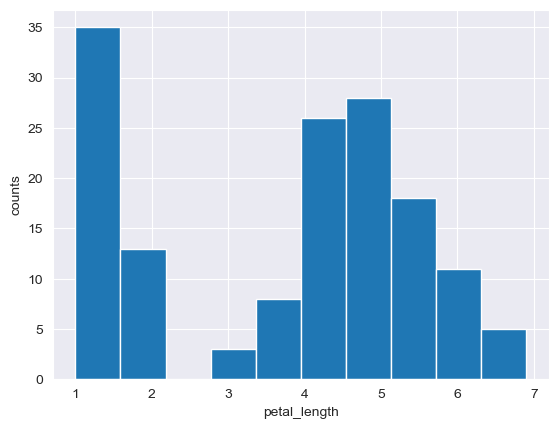

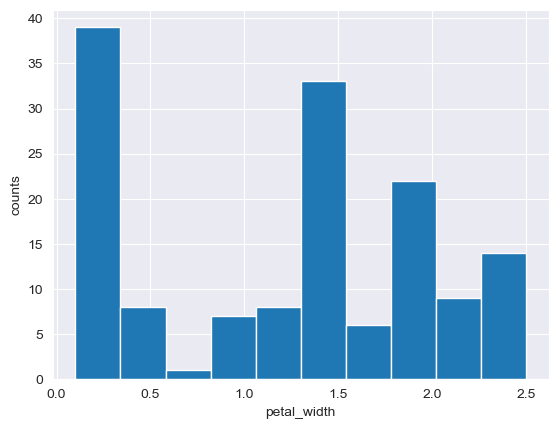

In [24]:
def plotColumnDistribution(df, column):
    plt.hist(df[column])
    plt.xlabel(column)
    plt.ylabel('counts')
    plt.show()

plotColumnDistribution(df, 'sepal_length')
plotColumnDistribution(df, 'sepal_width')
plotColumnDistribution(df, 'petal_length')
plotColumnDistribution(df, 'petal_width')

General statistics overview - if the min/max seems extremely far from the mean then outliners exists in the dataset

In [25]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Building the dataset

In [30]:
X = df.drop('species', axis=1)
y = df['species'].values

Standardize the data to remove outliners while keeping the proportional relationship between them

In [32]:
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(X)

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=1)

Logistic Regression Classification

In [43]:
from sklearn.linear_model import LogisticRegression

logisticRegModel = LogisticRegression(random_state=1)
logisticRegModel.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [44]:
predictions = logisticRegModel.predict(X_test)

In [46]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.92      0.92      0.92        13
           2       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [48]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,predictions)

array([[ 9,  0,  0],
       [ 0, 12,  1],
       [ 0,  1,  7]], dtype=int64)

Decision Trees

In [81]:
from sklearn.tree import DecisionTreeClassifier

decisionTreeClassifierModel = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=2,
    random_state=1
)

# Fit the algorithm to the training data.
decisionTreeClassifierModel.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, random_state=1)

In [82]:
predictions = decisionTreeClassifierModel.predict(X_test)

In [83]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.92      0.96        13
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [117]:
from sklearn.tree import ExtraTreeClassifier

extraTreeClassifierModel = ExtraTreeClassifier(
    random_state=1
)

# Fit the algorithm to the training data.
extraTreeClassifierModel.fit(X_train, y_train)

ExtraTreeClassifier(random_state=1)

In [118]:
predictions = extraTreeClassifierModel.predict(X_test)

In [119]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.93      1.00      0.96        13
           2       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.98      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [163]:
from sklearn.ensemble import RandomForestClassifier

randomForestClassifierModel = RandomForestClassifier(
    n_estimators=100,
    max_depth=3,
    random_state=1
)

# Fit the algorithm to the training data.
randomForestClassifierModel.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=1)

In [164]:
predictions = randomForestClassifierModel.predict(X_test)

In [165]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.92      0.96        13
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

